In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('SCDB_2018_02_caseCentered_Citation.csv',encoding = "ISO-8859-1")

In [4]:
pre1980 = data[ data['term'] < 1980 ]

In [5]:
post1980 = data[data['term'] >= 1980]

In [28]:
#We can Plot the 

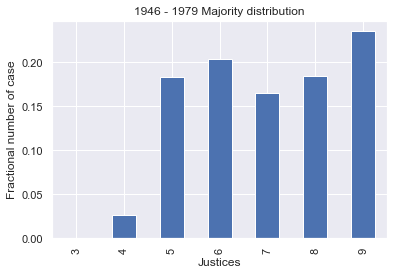

In [6]:
plt.title('1946 - 1979 Majority distribution')
plt.xlabel('Justices')
plt.ylabel('Fractional number of case')
pre1980_normal = pre1980['majVotes'].value_counts().sort_index()/sum(pre1980['majVotes'].value_counts().sort_index())
pre1980_normal.plot(kind='bar')

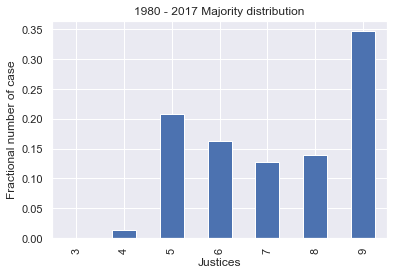

In [98]:
plt.title('1980 - 2017 Majority distribution')
plt.xlabel('Justices')
plt.ylabel('Fractional number of case')
post1980_normal = post1980['majVotes'].value_counts().sort_index()/sum(post1980['majVotes'].value_counts().sort_index())
post1980_normal.plot(kind='bar')

In [ ]:
#Let us look at the averge number of justices in the majority and minorty pre1980

In [7]:
pre1980_major = pre1980['majVotes']
pre1980_minor = pre1980['minVotes']
pre1980_maj_avg = np.average(pre1980_major)
pre1980_min_avg =np.average(pre1980_minor)

post1980_major = post1980['majVotes']
post1980_minor = post1980['minVotes']
post1980_maj_avg = np.average(post1980_major)
post1980_min_avg =np.average(post1980_minor)

In [8]:
pre1980_maj_avg,pre1980_min_avg

(7.00331468821214, 1.5769629169256267)

In [9]:
post1980_maj_avg,post1980_min_avg

(7.212739793408756, 1.5907525823905557)

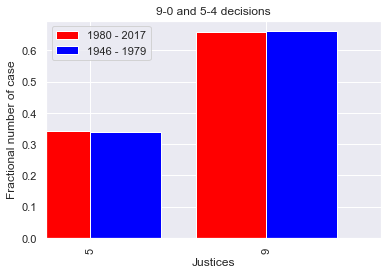

In [66]:
#Split the data for the pre and post 1980 to just include 9-0 and 5-4 decisions

splitter = ( ( (pre1980['majVotes'] == 9) & (pre1980['minVotes'] == 0) ) |
( (pre1980['majVotes'] == 5) & (pre1980['minVotes'] == 4) ) )

pre1980_split = pre1980[splitter]

splitter = ( ( (post1980['majVotes'] == 9) & (post1980['minVotes'] == 0) ) |
( (post1980['majVotes'] == 5) & (post1980['minVotes'] == 4) ) )

post1980_split = post1980[splitter]

post1980_split_sums = post1980_split['majVotes'].value_counts().sort_index()
post1980_split_normal = post1980_split_sums/sum(post1980_split_sums)

pre1980_split_sums = pre1980_split['majVotes'].value_counts().sort_index()
pre1980_split_normal = pre1980_split_sums/sum(pre1980_split_sums)

#and then plot the histograms

fig = plt.figure()
ax = fig.add_subplot(111)
width = 0.4
plt.title('9-0 and 5-4 decisions')
plt.xlabel('Justices')
plt.ylabel('Fractional number of case')

post1980_split_normal.plot(kind='bar', color='red', ax=ax, width=width, position=1,label = '1980 - 2017')
pre1980_split_normal.plot(kind='bar', color='blue', ax=ax, width=width, position=0, label = '1946 - 1979')
plt.legend(loc='upper left')
plt.show()